# Image Denoising Challenge

The goal for this challenge is to leverage your knowledge of Deep Learning to design and train a denoising model. For a given noisy image $X$, our model should learn to predict the denoised image $y$.


**Objectives**
- Visualize images
- Preprocess images for the neural network
- Fit a custom CNN for the task

In [1]:
import numpy as np
import pandas as pd
import glob
import tensorflow as tf

## 1. Load Data

👉 Let's download the dataset archive.
It contains RGB and Black & White images we will be using for the rest of this challenge.

In [2]:
#! curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/paintings.zip > paintings.zip
#! unzip -nq "paintings.zip" 
#! rm "paintings.zip"
#! ls -l

In [3]:
dataset_paths = glob.glob("./paintings/*.jpg")
dataset_paths

['./paintings/Joan_Miro_48.jpg',
 './paintings/Titian_232.jpg',
 './paintings/Amedeo_Modigliani_30.jpg',
 './paintings/Frida_Kahlo_21.jpg',
 './paintings/Marc_Chagall_59.jpg',
 './paintings/Salvador_Dali_116.jpg',
 './paintings/Vincent_van_Gogh_363.jpg',
 './paintings/Paul_Klee_47.jpg',
 './paintings/Kazimir_Malevich_106.jpg',
 './paintings/Leonardo_da_Vinci_7.jpg',
 './paintings/Francisco_Goya_199.jpg',
 './paintings/Vincent_van_Gogh_161.jpg',
 './paintings/Paul_Klee_90.jpg',
 './paintings/Paul_Cezanne_24.jpg',
 './paintings/Peter_Paul_Rubens_42.jpg',
 './paintings/Amedeo_Modigliani_184.jpg',
 './paintings/Titian_52.jpg',
 './paintings/Alfred_Sisley_165.jpg',
 './paintings/Paul_Gauguin_72.jpg',
 './paintings/Vincent_van_Gogh_767.jpg',
 './paintings/Raphael_106.jpg',
 './paintings/Pablo_Picasso_78.jpg',
 './paintings/Diego_Rivera_10.jpg',
 './paintings/Pieter_Bruegel_108.jpg',
 './paintings/Hieronymus_Bosch_25.jpg',
 './paintings/Joan_Miro_6.jpg',
 './paintings/Kazimir_Malevich_79.jpg'

❓ **Display the image at index `53` of this dataset_paths (i.e the 54-th image)**

<details>
    <summary>Hint</summary>
    Use the <code>PIL.Image.open</code> and <code>matplotlib.pyplot.imshow</code> functions.
</details>

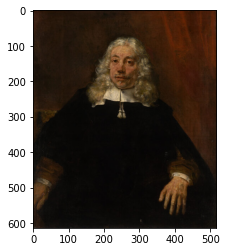

In [4]:
# YOUR CODE HERE
from PIL import Image
import matplotlib.pyplot as plt
with Image.open(dataset_paths[53]) as im:
    plt.imshow(im)

❓ **What is the shape of the image you displayed above `img_shape`?  How many dimensions `img_dim` does it have ?**

In [5]:
img_shape = plt.imread(dataset_paths[0]).shape

In [6]:
img_dim =  plt.imread(dataset_paths[0]).shape[2]

In [7]:
img_dim

3

❓ **What was in the image above?**

In [8]:
img_shape = img_shape
img_dim = img_dim

# Uncomment the correct answer

is_portrait = True
#is_portrait = False

is_colored_image = True
#is_colored_image = False

In [9]:
from nbresult import ChallengeResult
result = ChallengeResult(
    'data_loading',
    img_shape=img_shape,
    img_dim=img_dim,
    is_portrait=is_portrait,
    is_colored_image=is_colored_image
)

result.write()

## 2. Processing

❓ **Store all images from the dataset folder in a list of numpy arrays called `dataset_images`**

- It can take a while
- If the dataset is too big to fit in memory, just take the first half (or quarter) of all pictures

In [10]:
# YOUR CODE HERE
dataset_images=[]
for url_image in dataset_paths[:300]:
    dataset_images.append(plt.imread(url_image))

In [11]:
len(dataset_images)

300

### 2.1 Reshape, Resize, Rescale

Let's simplify our dataset and convert it to a single numpy array

❓ **First, check if that all the images in the dataset have the same number of dimensions**.
- What do you notice?
- How do you explain it? 

In [12]:
set([x.ndim for x in dataset_images])

{2, 3}

In [13]:
#!pip install tqdm
from tqdm import tqdm

👉 We convert for you all black & white images into 3-colored ones by duplicating the image on three channels, so as to have only 3D arrays

In [14]:
dataset_images = [x if x.ndim==3 else np.repeat(x[:,:,None], 3, axis=2) for x in tqdm(dataset_images)]
set([x.ndim for x in dataset_images])

100%|██████████| 300/300 [00:00<00:00, 758.64it/s]


{3}

In [15]:
dataset_images[0].shape

(358, 434, 3)

❓ **What about their shape now ?**
- Do they all have the same width/heights ? If not:
- Resize the images (120 pixels height and 100 pixels width) in the dataset, using `tensorflow.image.resize` function.
- Now that they all have the same shape, store them as a numpy array `dataset_resized`.
- This array should thus be of size $(n_{images}, 120, 100, 3)$

In [16]:
# YOUR CODE HERE
for i in range(len(dataset_images)):
    dataset_images[i] = tf.image.resize(dataset_images[i],[120,100])

In [17]:
dataset_resized = np.array(dataset_images[:300])

In [21]:
dataset_resized.shape

(300, 120, 100, 3)

❓ **Rescale the data of each image between $0$ and $1$**
- Save your resulting list as `dataset_scaled`

In [22]:
# YOUR CODE HERE
dataset_scaled = dataset_resized/255

In [23]:
dataset_scaled.shape

(300, 120, 100, 3)

### 2.2 Create (X,y) sets

👉 Now, we'll add for you some **random noise** to our images to simulate noise (that our model will try to remove later)

In [24]:
NOISE_LEVEL = 0.2

dataset_noisy = np.clip(
    dataset_scaled + np.random.normal(
        loc=0,
        scale=NOISE_LEVEL,
        size=dataset_scaled.shape
    ).astype(np.float32),
    0,
    1
)
dataset_noisy.shape

(300, 120, 100, 3)

❓ **Plot a noisy image below to visualize the noise and compare it with the normal one**

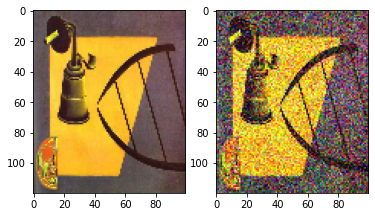

In [26]:
# YOUR CODE HERE
plt.subplot(1,2,1)
plt.imshow(dataset_scaled[0])
plt.subplot(1,2,2)
plt.imshow(dataset_noisy[0])

❓ **Create your `(X_train, Y_train)`, `(X_test, Y_test)` training set for your problem**

- Remember you are trying to use "noisy" pictures in order to predict the "normal" ones.
- Keeping about `20%` of randomly sampled data as test set

In [29]:
# YOUR CODE HERE
X_train = dataset_noisy[:240]
X_test = dataset_noisy[240:]
Y_train = dataset_scaled[:240]
Y_test = dataset_scaled[240:]

In [30]:
from nbresult import ChallengeResult
result = ChallengeResult(
    "preprocessing",
    X_train_shape = X_train.shape,
    Y_train_shape = Y_train.shape,
    X_std = X_train[:,:,:,0].std(),
    Y_std = Y_train[:,:,:,0].std(),
    first_image = Y_train[0]
)
result.write()

## 3. Convolutional Neural Network

A commonly used neural network architecture for image denoising is the __AutoEncoder__.

<img src='https://github.com/lewagon/data-images/blob/master/DL/autoencoder.png?raw=true'>

Its goal is to learn a compact representation of your data to reconstruct them as precisely as possible.  
The loss for such model must incentivize it to have __an output as close to the input as possible__.

For this challenge, __you will only be asked to code the Encoder part of the network__, since building a Decoder leverages layers architectures you are not familiar with (yet).

👉 Run this code below if you haven't managed to build your own (X,Y) training sets. This will load them as solution

```python
! curl https://wagon-public-datasets.s3.amazonaws.com/certification_france_2021_q2/data_painting_solution.pickle > data_painting_solution.pickle

import pickle
with open("data_painting_solution.pickle", "rb") as file:
    (X_train, Y_train, X_test, Y_test) = pickle.load(file)
    
! rm data_painting_solution.pickle
```

### 3.1 Architecture

👉 Run the cell below that defines the decoder

In [31]:
import tensorflow as tf
from tensorflow.keras import layers, losses, Sequential

In [32]:
# We choose to compress images into a latent_dimension of size 6000
latent_dimensions = 6000

# We build a decoder that takes 1D-vectors of size 6000 to reconstruct images of shape (120,100,3)
decoder = Sequential(name='decoder')
decoder.add(layers.Reshape((30, 25, 8), input_dim=latent_dimensions))
decoder.add(layers.Conv2DTranspose(filters=16, kernel_size=3, strides=2, padding="same", activation="relu"))
decoder.add(layers.Conv2DTranspose(filters=32, kernel_size=3, strides=2, padding="same", activation="relu"))
decoder.add(layers.Conv2D(filters=3, kernel_size=3, padding="same", activation="sigmoid"))
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 30, 25, 8)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 60, 50, 16)        1168      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 120, 100, 32)      4640      
_________________________________________________________________
conv2d (Conv2D)              (None, 120, 100, 3)       867       
Total params: 6,675
Trainable params: 6,675
Non-trainable params: 0
_________________________________________________________________


❓ **Now, build the `encoder` that plugs correctly with the decoder defined above**. Make sure that:
- The output of your `encoder` is the same shape as the input of the `decoder`
- Use a convolutional neural network architecture without transfer learning
- Keep it simple
- Print model summary

In [33]:
# CODE HERE YOUR ENCODER ARCHITECTURE AND PRINT IT'S MODEL SUMMARY
encoder = Sequential(name='encoder')

encoder.add(layers.Conv2D(8, (3,3), input_shape=(120, 100, 3), activation='relu'))
encoder.add(layers.MaxPooling2D(2))

encoder.add(layers.Conv2D(16, (2, 2), activation='relu'))
encoder.add(layers.MaxPooling2D(2))   

encoder.add(layers.Flatten())
encoder.add(layers.Dense(6000, activation='tanh'))

In [34]:
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 118, 98, 8)        224       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 59, 49, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 58, 48, 16)        528       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 24, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 11136)             0         
_________________________________________________________________
dense (Dense)                (None, 6000)              66822000  
Total params: 66,822,752
Trainable params: 66,822,752
Non-trainable params: 0
_______________________________________________

👉 **Test your encoder below**

In [35]:
# HERE WE BUILD THE AUTO-ENCODER (ENCODER + DECODER) FOR YOU. IT SHOULD PRINT A NICE SUMMARY
from tensorflow.keras.models import Model

x = layers.Input(shape=(120, 100, 3))
autoencoder = Model(x, decoder(encoder(x)), name="autoencoder")
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 120, 100, 3)]     0         
_________________________________________________________________
encoder (Sequential)         (None, 6000)              66822752  
_________________________________________________________________
decoder (Sequential)         (None, 120, 100, 3)       6675      
Total params: 66,829,427
Trainable params: 66,829,427
Non-trainable params: 0
_________________________________________________________________


### 3.2 Training

❓ **Before training the autoencoder, evaluate your baseline score**
- We will use the mean absolute error in this challenge
- Compute the baseline score on your test set in the "stupid" case where you don't manage to de-noise anything at all.
- Store the result under `score_baseline`

In [36]:
# YOUR CODE HERE
from tensorflow.keras.metrics import mean_absolute_error

In [37]:
# YOUR CODE HERE
score_baseline = np.mean(mean_absolute_error(Y_test, X_test))
score_baseline

0.14185397

❓ Now, **train your autoencoder**

- Use an appropriate loss
- Adapt the learning rate of your optimizer if convergence is too slow/fast
- Make sure your model does not overfit with appropriate control techniques

💡 You will not be judged by the computing power of your computer, you can reach decent performance in less than 5 minutes of training without GPUs.

In [46]:
# YOUR CODE HERE
def compile_autoencoder(autoencoder):
    autoencoder.compile(loss='mae',
                  optimizer='adam')

In [47]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(patience=10,verbose=0,restore_best_weights=True)

In [48]:
compile_autoencoder(autoencoder)
history=autoencoder.fit(X_train,
                        y_train, 
                        validation_split=0.2,
                        epochs=20, 
                        batch_size=32,
                        callbacks=[es])

Epoch 1/20
6/6 [==============================] - 8s 1s/step - loss: 0.1545 - val_loss: 0.1528
Epoch 2/20
6/6 [==============================] - 7s 1s/step - loss: 0.1425 - val_loss: 0.1462
Epoch 3/20
6/6 [==============================] - 6s 1s/step - loss: 0.1361 - val_loss: 0.1449
Epoch 4/20
6/6 [==============================] - 6s 1s/step - loss: 0.1316 - val_loss: 0.1424
Epoch 5/20
6/6 [==============================] - 6s 1s/step - loss: 0.1306 - val_loss: 0.1413
Epoch 6/20
6/6 [==============================] - 8s 1s/step - loss: 0.1289 - val_loss: 0.1400
Epoch 7/20
6/6 [==============================] - 8s 1s/step - loss: 0.1248 - val_loss: 0.1382
Epoch 8/20
6/6 [==============================] - 7s 1s/step - loss: 0.1203 - val_loss: 0.1374
Epoch 9/20
6/6 [==============================] - 7s 1s/step - loss: 0.1205 - val_loss: 0.1368
Epoch 10/20
6/6 [==============================] - 9s 2s/step - loss: 0.1149 - val_loss: 0.1365
Epoch 11/20
6/6 [==============================] 

❓ **Plot your training and validation loss at each epoch using the cell below**

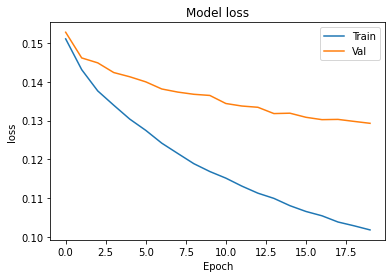

<Figure size 432x288 with 0 Axes>

In [54]:
# Plot below your train/val loss history
def plot_history(history, metric):
    plt.plot(history.history[f'{metric}'])
    plt.plot(history.history[f'val_{metric}'])
    plt.title(f'Model {metric}')
    plt.ylabel(f'{metric}')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='best')
    plt.show()

plot_history(history,'loss')


# Run also this code to save figure as jpg in path below (it's your job to ensure it works)
fig = plt.gcf()
plt.savefig("tests/history.png")

❓ **Evaluate your performances on test set**
- Compute your de-noised test set `Y_pred` 
- Store your test score as `score_test`
- Plot a de-noised image from your test set and compare it with the original and noisy one using the cell below

In [50]:
# YOUR CODE HERE
Y_pred = autoencoder.predict(Y_test)

In [51]:
score_test = autoencoder.evaluate(X_test,y_test)
score_test

2/2 [==============================] - 0s 163ms/step - loss: 0.1270


0.1270436942577362

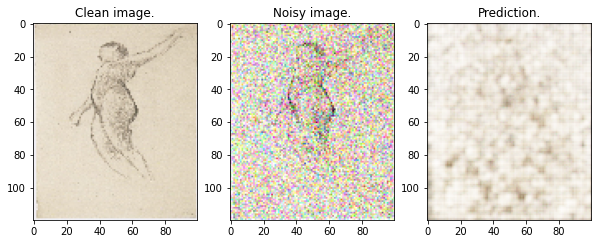

In [52]:
# RUN THIS CELL TO CHECK YOUR RESULTS
idx = 0

fig, axs = plt.subplots(1,3, figsize=(10,5))
axs[0].imshow(Y_test[idx])
axs[0].set_title("Clean image.")

axs[1].imshow(X_test[idx])
axs[1].set_title("Noisy image.")

axs[2].imshow(Y_pred[idx])
axs[2].set_title("Prediction.")

# Run this to save your results for correction
plt.savefig('tests/image_denoised.png')

🧪 **Send your results below**

In [53]:
from nbresult import ChallengeResult

result = ChallengeResult(
    "network",
    input_shape = list(encoder.input.shape),
    output_shape = list(encoder.output.shape),
    layer_names = [layer.name for layer in encoder.layers],
    trainable_params = sum([tf.size(w_matrix).numpy() for w_matrix in encoder.trainable_variables]),
    score_baseline = score_baseline,
    score_test = score_test,
)
result.write()